<a href="https://colab.research.google.com/github/ErSangram/hotel_booking/blob/main/Hotel_Booking_Analysis_Sangram_Naik_Capstone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Hotel Booking Analysis

##### **Project Type**    - EDA
##### **Contribution** - Individual
##### **Team Member 1** - Sangram Naik

  # **Project Summary** -
  This project involves the analysis of the provided data set pertaining to Hotel bookings for City and Resort Hotels.  
Hotel industry is a complicated field for data analysis. Hotel performance depends on a lot of variables: location, room types distribution, meals, tour operators, time of the year flights capacity, etc.   

   Booking data is the one of the most granular data in the hotel industry from the perspective of the revenue: one can disclose time paterns or try to predict outcomes like wheter a booking will end up in a cancellation.    
    
   In this project I'll try to use an open dataset with information of two real hotels to answer questions of interest regarding the industry, and those hotels in particular.  
It's real booking data from two hotels: one resort hotel and one city hotel, with arrivals from july 2015 to august 2017, including a total of 21 variables. 




#**GitHub Link** -

# **Problem Statement**

Case study based on the Hotel bookings related data is vital for any hospitality business as it gives insight into booking behaviour of customers as well as channels through which bookings are made.   
And I invest this data in this project to analyse various aspects of booking behaviour by customers to answer various business challenges faced by hotel through rigorous study of:     
*   Which type of hotel is mostly prefered by the guests?   
*   Which is the most busy month for hotel?   
*   From which country most guest come?   
*   How Long People Stay in the hotel?    
*   


**Business Objective.**   
*   Explore and analyze the data to discover important factors that govern the bookings of Hotels.     
*   Generate insites that will helpfull for make business analysis and take appropriate business desigens. 
*   Make project usefull for know and understanding various hidden business problems regarding varius factores like Bookings, lead_time, service, Cancellations, Ratings and most important profit. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Alma_projects/Hotel Bookings.csv')

### Dataset First View

In [4]:
# Dataset First Look see top 5 rows
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'A Data contain {data.shape[0]} rows and {data.shape[1]} Columns')

A Data contain 119390 rows and 32 Columns


### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

31994

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
n_df = data.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null_values'})
n_df.head(7)

,Columns,Null_values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0


### Dataset Observations.

*   Data from two hotels: one resort hotel and one city hotel, with arrivals from july 2015 to august 2017.
*   The dataset has 119390 rows and 32 columns. The columns contains various data types this are object, int and float.       
*   The dataset also have 31994 duplicate values.      
*   There are null values in 4 columns that is children,country,agent,company.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# Dataset Describe using description of the data with statistical turms.
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 


*   **Hotel:** H1= Resort Hotel, H2= City Hotel    
*   **is_canceled** : If the booking was canceled(1) or not(0)      
*   **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS(Property Management System) and the arrival date   
*   **arrival_date_year** : Year of arrival date.  
*   **arrival_date_month** : Month of arrival date.  
*   **arrival_date_week_number** : Week number for arrival date.  
*   **arrival_date_day_of_month**: Which day of the months guest is arriving.  
*   **stays_in_weekend_nights**: Number of weekend nights (Saturday or    Sunday) the guest stayed or booked to stay at the hotel.  
*   **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.  
*   **adults** : Number of adults.  
*   **children** : Number of children.  
*   **babies** : Number of babies.   
*   **meal**: kind of meal opted for.  
*   **country** : Country code.  
*   **market_segment**: Through which channel hotels were booked.  
*   **distribution_channel** : How the customer accessed the stay-   Corporate Booking/Direct/TA.TO
*   **is_repeated_guest** : the booking name was from a repeated guest (1) or not (0).  
*   **previous_cancellations** : Was there a cancellation before.  
*   **previous_bookings_not_canceled** : Count of previous bookings not cancelled.   
*   **reserved_room_type** : Code of room type reserved.  
*   **assigned_room_type** : Code for the type of room assigned to the booking.   
*   **booking_changes** : Count of changes made to booking.  
*  **deposit_type** : Deposit type.  
*  **agent** : the booking happens through agents or not.  
*   **company** : the booking happens through companies. 
*   **days_in_waiting_list** : Number of days the booking was on the   waiting list before the confirmation to the customer.
*   **customer_type** : Booking type like Transient – Transient-Party –   Contract – Group.  
*   **adr** : Average Daily Rates that described via way of means of   dividing the sum of all accommodations transactions using entire numbers of staying nights.  
*   **required_car_parking_spaces** : How many parking areas are necessary for the customers.  
*   **total_of_special_requests** : Total special requests from consumers.  
*   **reservation_status** : The last status of reservation, three categories : Canceled – cancelled by the customer; Check-Out.
*   **reservation_status_date**: The last status date.  

In [11]:
sns.set(color_codes=True)

<Axes: >

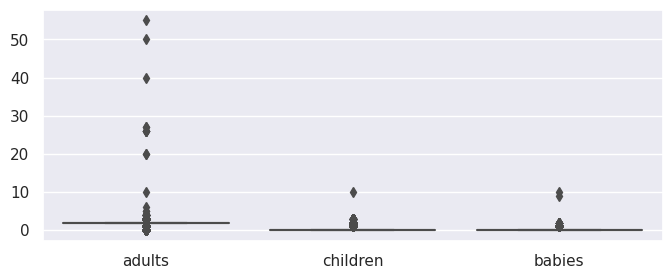

In [12]:
# Check outlires in adults, children and babies 
plt.figure(figsize = (8,3))
sns.boxplot(data = data[['adults' , 'children', 'babies']])

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(data.columns):
    a.append(i)
    b.append(data[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,hotel,2
1,is_canceled,2
2,lead_time,479
3,arrival_date_year,3
4,arrival_date_month,12
5,arrival_date_week_number,53
6,arrival_date_day_of_month,31
7,stays_in_weekend_nights,17
8,stays_in_week_nights,35
9,adults,14


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Need to make data clean frist delete duplicate values from the dataset
data.drop_duplicates(inplace=True)

In [15]:
#Delete company	column due to this column contains huge amount of null data.
data.drop(['company'],axis=1, inplace=True)

In [16]:
# Remove outlier from  Adult, children, babies and lead_time columns.
data = data[(data['adults']<5) & (data['children']<5) & (data['babies']<4) & (data['lead_time'] < 500)] 

In [17]:
data.shape

(87297, 31)

In [18]:
#Other columns agent, country and children	have less number of null values then they can fill using varies methoeds.
data['agent'].fillna(method='ffill', inplace=True)
data['country'].fillna(method='ffill', inplace=True)
data['children'].fillna(0,inplace=True)
data.dropna(inplace=True)

<ipython-input-18-6cca6be231b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['agent'].fillna(method='ffill', inplace=True)
<ipython-input-18-6cca6be231b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'].fillna(method='ffill', inplace=True)
<ipython-input-18-6cca6be231b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['children'].fillna(0,inplace=True)


In [19]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [20]:
data['is_canceled'].value_counts()

0    63337
1    23958
Name: is_canceled, dtype: int64

In [21]:
# add some new columns
data['kids'] = data['babies'] + data['children']
data['total_people'] = data['adults'] + data['babies'] + data['children']   
data['total_stay_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']   

In [22]:
# in dataset see the datatypes of children, agent and total_people columns are incorect,change their datatypes.
data['children']= data['children'].astype(int)
data['total_people'] = data['total_people'].astype(int)

In [23]:
# seperate data of not canceled bookings.
df_not_canceled = data[data['is_canceled'] == 0]

###  Manipulations and insights found

*   Firstly, deleted all duplicated rows and unnecessary columns from Dataset.  
*   Secondly, remove outlier from  Adult, children, babies and lead_time columns.
*   handled all null/missing values.  
*   Added new columns for better analysis. 
*   Then changed the data types of columns to suitable data types. and Fixed more erroneous data.  


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**First see the correlation between all variables:**

<Axes: >

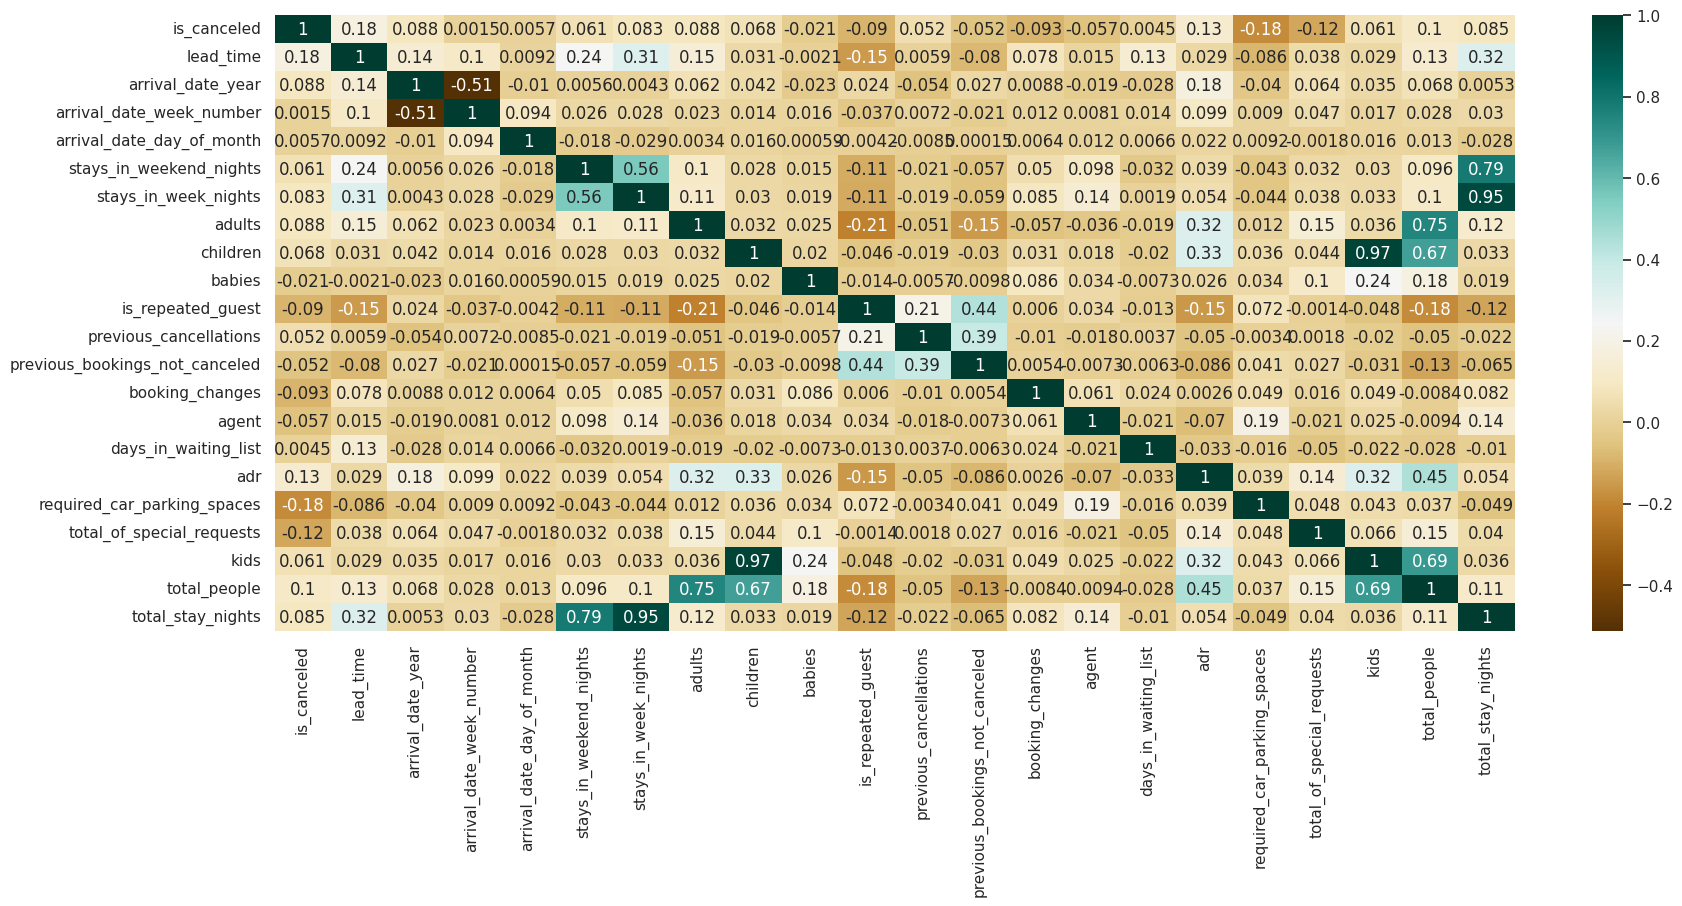

In [24]:
# Find the relation between the variables
plt.figure(figsize=(20,8))
c_r= data.corr()
sns.heatmap(c_r,cmap="BrBG",annot=True)

### 1) Which type of hotel is mostly prefered by the guests?

Text(0.5, 1.0, 'Hotel Booking in %')

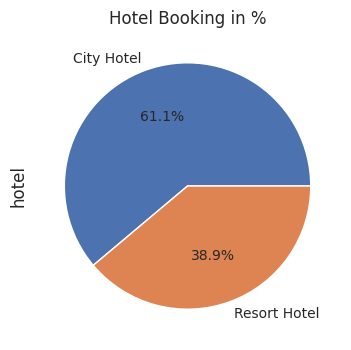

In [46]:
# Visualizse bookings by type of hotel on pie chart.
data['hotel'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,4),fontsize=10)
plt.title('Hotel Booking in %')

###Obseravtion :
##### Why did  pick the specific chart?   

From our data seen the data are divided in main two parts that is "Type of Hotel", that couse we need to how dada is divided in thus two parts.   

##### the insight(s) found from the chart?
In this pie chart we seen the records of City Hotel is more than the Resort Hotels. that means booking are more of City Hotels.

### 2).Which is the most busy month for hotel

In [26]:
# seperate the 2016 year data due to in 2015 and 2017 have less months out of 12 that gives wrong information.
df_2016 = data[data['arrival_date_year']== 2016]

Text(0, 0.5, 'Booking (%)')

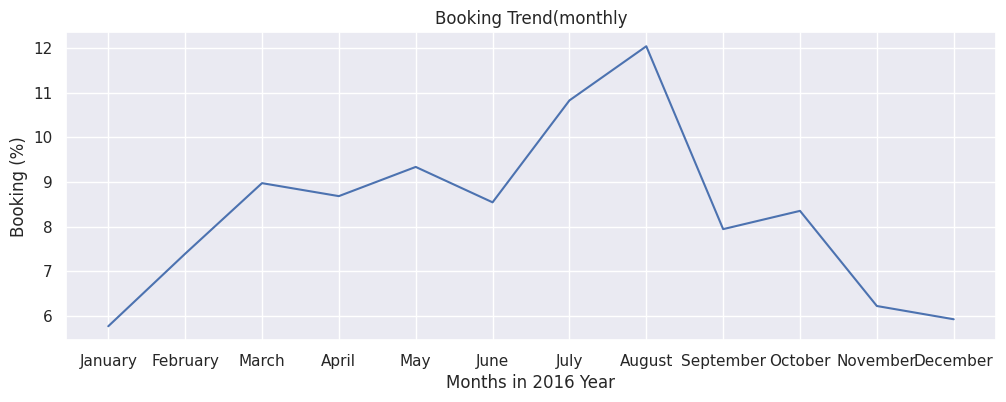

In [40]:
manths = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(manths)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

plt.figure(figsize = (12,4)) 
sns.lineplot(x = x, y= y.values)
plt.title('Booking Trend(monthly')
plt.xlabel('Months in 2016 Year')
plt.ylabel('Booking (%)')

###Obseravtion :  
Above plot show these two hotel and resorts, the most preferable months for tourists are 'August' and 'July' and the least preferable are 'January' and 'December'. that is August 11.5% and July 10.5% of yearly bookings

#### 3) From which country most guest come?



Text(0.5, 0, 'Countrie Names')

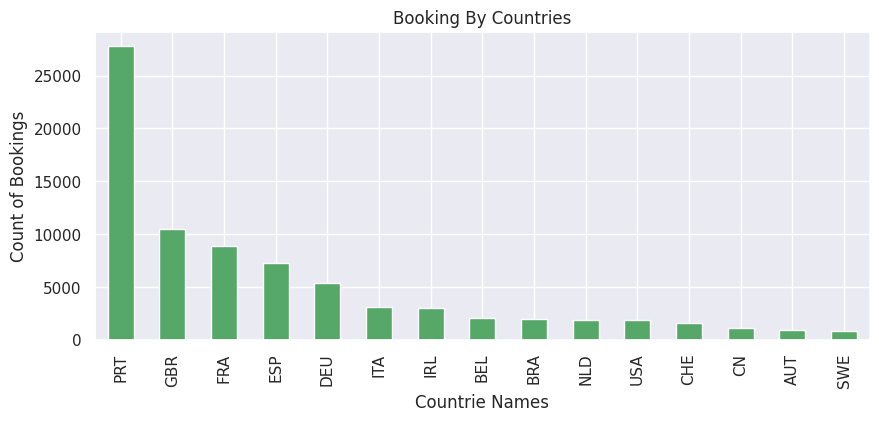

In [28]:
# Seperate the count of Bookings for all countries from the country column and plot barchart 
data['country'].value_counts().nlargest(15).plot(kind='bar', figsize=(10,4),color='g')
plt.title('Booking By Countries')
plt.ylabel('Count of Bookings')
plt.xlabel('Countrie Names')

###Obseravtion : 
Most common countries of origin are: Portugal, Great Britain and France and Least common countries of origin are: Honduras, British Virgin Islands and Namibia

### 4) How Long People Stay in the hotel?

Text(0, 0.5, 'Count of bookings')

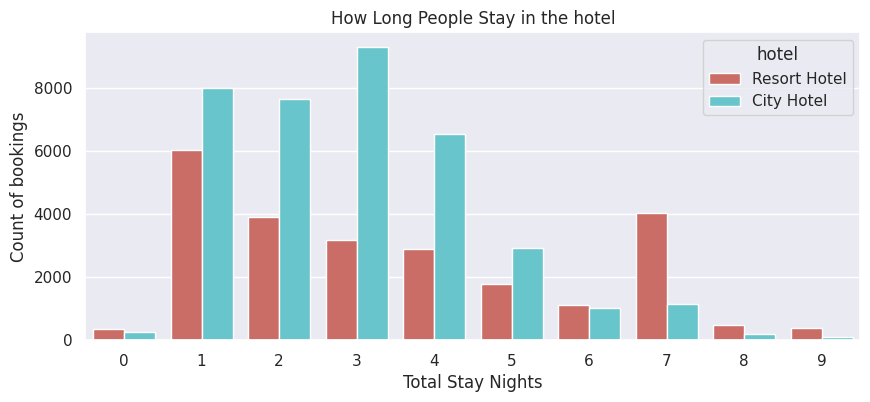

In [29]:
# Show the how long people stay in the both hotels seperatly.
stay_df = df_not_canceled[df_not_canceled['total_stay_nights'] <10]
plt.figure(figsize = (10,4))
sns.countplot(x = stay_df['total_stay_nights'], hue=stay_df['hotel'], palette ='hls')
plt.title('How Long People Stay in the hotel')
plt.xlabel('Total Stay Nights')
plt.ylabel('Count of bookings')

###Obseravtion :
Here we can see that the most preferred length of stay by guests in both the hotel types is less than 4 days and people prefer city hotels for short stays and resort hotels for longer stays

#### 5) Which is the most preferred room type by the customers?

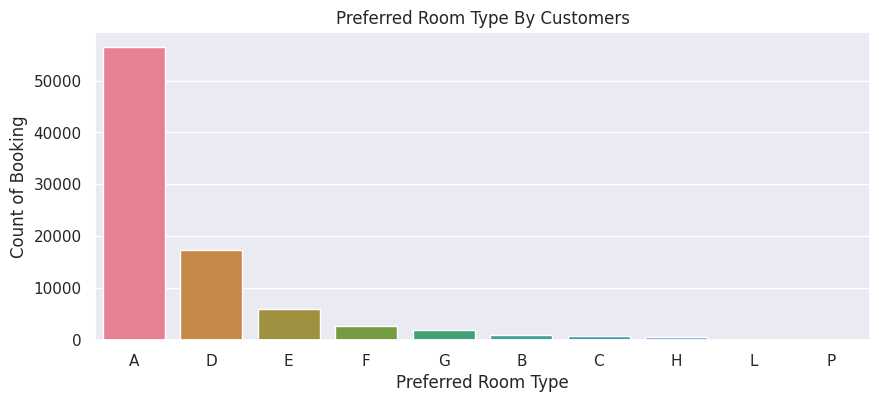

In [30]:
# plot the bar chart useing sns count plot to show count of room type booked by customers.
plt.figure(figsize=(10,4))
order = data['reserved_room_type'].value_counts().index
sns.countplot(x ='reserved_room_type', order = order, palette = 'husl', data=data)
plt.title('Preferred Room Type By Customers')
plt.xlabel('Preferred Room Type')
plt.ylabel('Count of Booking')
plt.show()

###Obseravtion :
most of customerse reserved room is class 'A' type

### 6) Type of Bookings like Transient,Transient-Party,Contract – Group.

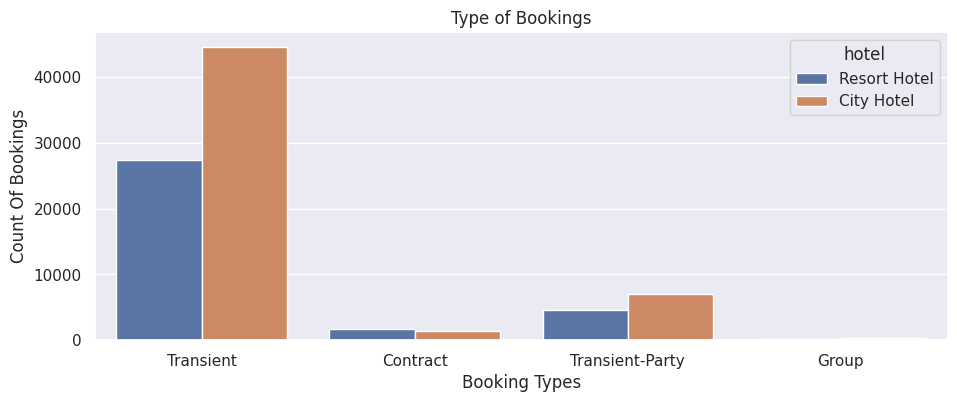

In [41]:
# Plot count plot on Type of Bookings.
plt.figure(figsize=(11,4))
sns.countplot(x='customer_type',hue='hotel',data=data)
plt.title('Type of Bookings')
plt.xlabel('Booking Types')
plt.ylabel('Count Of Bookings')
plt.show()

###Obseravtion :
Mostly type of booking made by customers that are in Transient category.

###**7). What is the most popular type of meal package?**

In [32]:
data['meal'].value_counts()

BB           67898
SC            9480
HB            9065
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0.5, 0, 'Meal Type ')

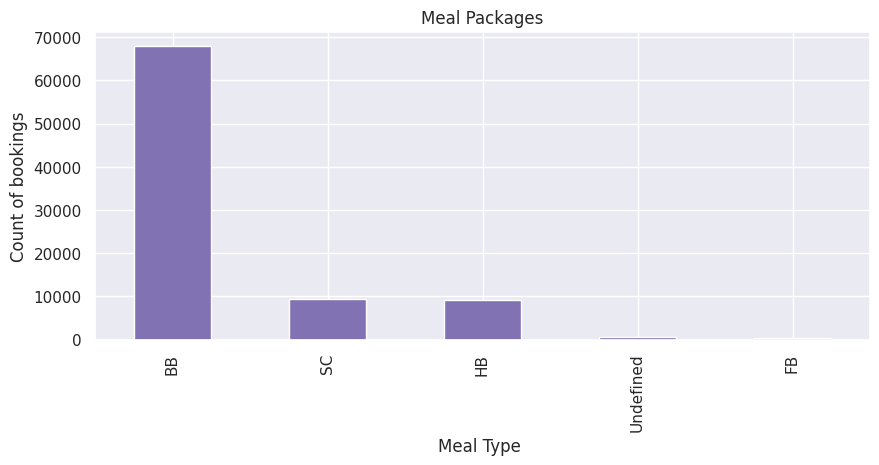

In [42]:
# Plot the types of meal package preferred by customers:
types_of_meal = data['meal'].value_counts()
plt.figure(figsize=(10,4))
types_of_meal.plot(kind='bar', color = 'm')
plt.title('Meal Packages')
plt.ylabel('Count of bookings')
plt.xlabel('Meal Type ')

###Obseravtion :
Type Of Males : BB :-Bed and Breakfast,  HB :- Half Board,  SC :- Self Catering FB  :-Full Board    
Majority of customers opted for Bed and Breakfast meal type.

###**8). Lead time and reservation cancellation relation:**

Text(0.5, 0, 'Arrival Date Of Year')

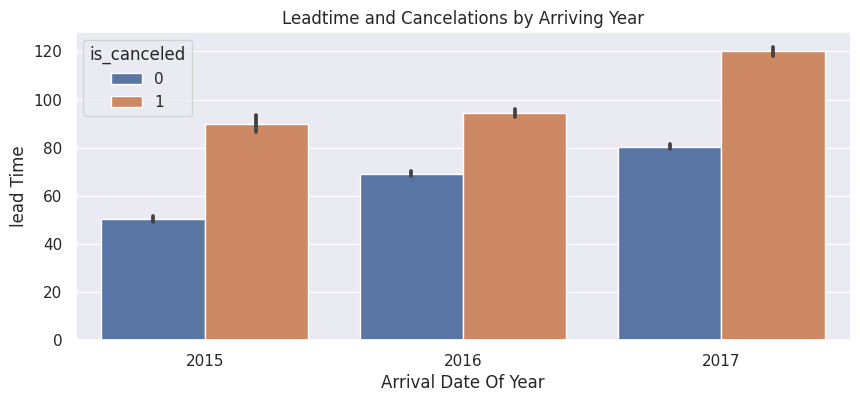

In [43]:
# Plotting the lead time and cancellation relationship:
plt.figure(figsize=(10,4))
sns.barplot(x= 'arrival_date_year', y='lead_time', hue='is_canceled', data=data)
plt.title('Leadtime and Cancelations by Arriving Year')
plt.ylabel('lead Time')
plt.xlabel('Arrival Date Of Year')

###Obseravtion :
For all 3 years, bookings with a lead time less than 100 days have less chances of cancellations and lead time more than 100 days have more chances of getting canceled

###**9).Cancellation rates in city hotels and Resort hotels:**

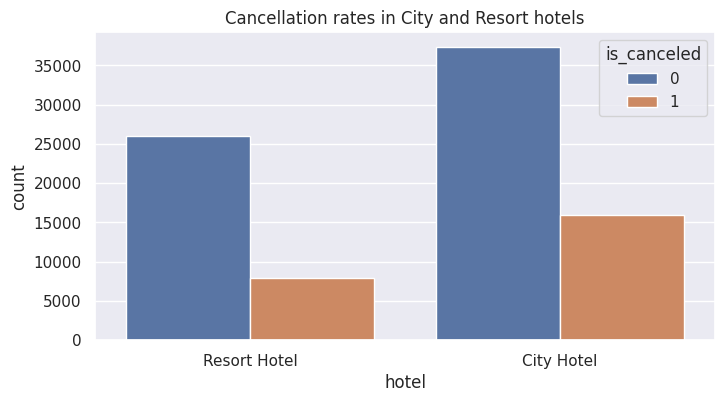

In [57]:
# Plotting cancellation rates in city hotels and resort hotels
plt.figure(figsize=(8,4))
sns.countplot(x= 'hotel', hue='is_canceled', data=data)
plt.title("Cancellation rates in City and Resort hotels")
plt.show()

###Obseravtion :
Cancellation percentage in resort hotel is less compared to city hotel

###**10). If the guests have booked these properties again?**

Text(0.5, 1.0, 'Customer Revisit Chart')

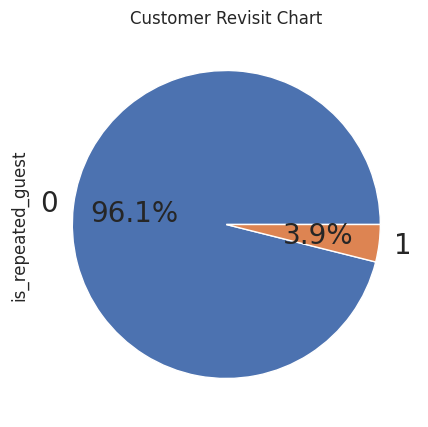

In [50]:
# plotting pie chart on Customer Revisit.
data['is_repeated_guest'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,5),fontsize=20)
plt.title('Customer Revisit Chart')

###Obseravtion :
Majority of guests are fresh arrivals and 3.9 % guests have arrived again.

###**11) Annually variation in ADR means Average Daily Rates in both Hotels in year 2016:**

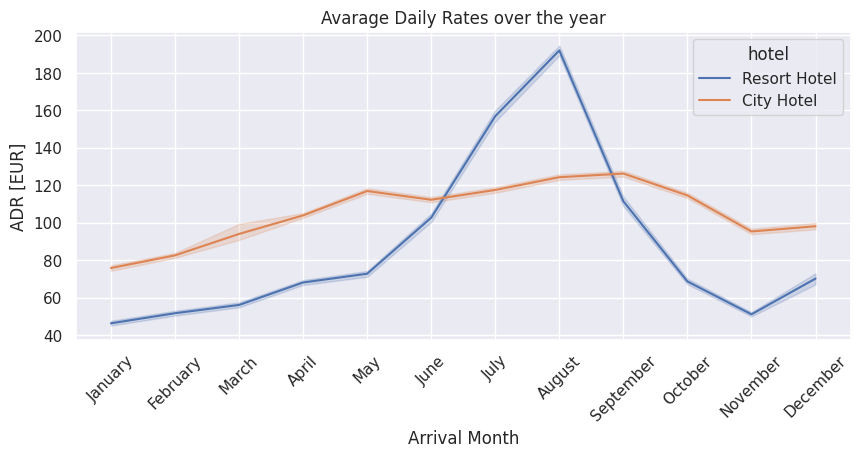

In [51]:
# Ploting Monthwise Line chart for Annual variation of ADR Year 2016.
plt.figure(figsize=(10,4))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data= df_2016)
plt.title("Avarage Daily Rates over the year")
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("ADR [EUR]")
plt.show()

###Observation:
The graph here is Line plot of seaborn library which is used to show how the Average Daily Rates are change yearly for both hotel types.

From visualization we can observe that there is less variation in prices for city Hotels as compared to Resort Hotels. Prices for Resort Hotel are highest in August and least in November and January. For City hotel, prices are highest in May and least in January.

#**Conclusion:**

**From this case study, the conclusions that i have made are:**

*   The majority of reservations are for City Hotels.

*   The most preferable months by guests for both of the hotel types are July and august.

*   The number of repeated guests are too low.

*   The majority of guests come from western europe countries like Portugal,France and Great Britain.


*  The most preffered length of stay by guests is less than 4 days and guests prefer city hotels for shorter stays and resort hotels for long stays
*   The Lead Time and rate of cancellation are directly propotional i.e. the sooner a guest books the room from the date of their stay, higher are the chances of cancellation.
*   The majority of reservations convert into successful stays.

*   Majority of the bookings were made through travel agents. So it is advisable to the hotels to partner with more travel agents.
* The best time to book a stay in resort hotels is in November and January months while for city hotels it's in January and February months as average daily rates of rooms are comaparatively lower in these particular months.